In [1]:
from datetime import datetime
from pathlib import Path
import importlib
import time
import win32com.client
import os
import warnings
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import download_mail_file as dmf
import file_management as fm
import graphic_settings as gs
import send_reports_through_wssp as srtw
import print_management as pm

### Banner

In [2]:
# import pyfiglet
# print(pyfiglet.figlet_format("Ralenti WSSP"))

banner = r"""
 ____       _            _   _  __        ______ ____  ____  
|  _ \ __ _| | ___ _ __ | |_(_) \ \      / / ___/ ___||  _ \ 
| |_) / _` | |/ _ \ '_ \| __| |  \ \ /\ / /\___ \___ \| |_) |
|  _ < (_| | |  __/ | | | |_| |   \ V  V /  ___) |__) |  __/ 
|_| \_\__,_|_|\___|_| |_|\__|_|    \_/\_/  |____/____/|_|                                                               

    💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥
"""

print(banner, end='\n\n')
time.sleep(1)


 ____       _            _   _  __        ______ ____  ____  
|  _ \ __ _| | ___ _ __ | |_(_) \ \      / / ___/ ___||  _ \ 
| |_) / _` | |/ _ \ '_ \| __| |  \ \ /\ / /\___ \___ \| |_) |
|  _ < (_| | |  __/ | | | |_| |   \ V  V /  ___) |__) |  __/ 
|_| \_\__,_|_|\___|_| |_|\__|_|    \_/\_/  |____/____/|_|                                                               

    💥 AUTOMATIZADOR DE ENVIO DE REPORTES POR WSSP 💥




### Configuracion

In [4]:
# Constantes usadas en el notebook
MAPI = "MAPI" # Messaging Application Programming Interface
DOT = "."
OUTLOOK = "Outlook"
APPLICATION = "Application"

# Diccionarios
outlook_folder_codes = {
    0: 'Calendario',
    1: 'Contactos',
    2: 'Borradores',
    3: 'Diario / Jornal',
    4: 'Notas',
    5: 'Tareas',
    6: 'Bandeja de entrada',
    7: 'Bandeja de salida',
    8: 'Elementos enviados',
    9: 'Elementos eliminados',
    10: 'Bandeja de correo del servidor',
    11: 'Conflictos',
    12: 'Elementos de sincronizacion local',
    13: 'Elementos de sincronizacion (Envio)',
    14: 'Elementos de sincronización (Recibo)',
    15: 'Elementos de sincronización completa',
    16: 'Diario de formularios',
    17: 'Carpeta de búsqueda',
    18: 'Bandeja para reglas cliente',
    19: 'Carpeta de sugerencias de correo',
}
outlook_object_types = {
    "AppointmentItem": 26,
    "MailItem": 43,
    "TaskItem": 46,
    "ContactItem": 48,
    "MeetingItem": 53,
}
parse_locaciones = {
    '06 AYA EL PEDREGAL': 'Pedregal',
    '38 AYA ATICO': 'Atico',
    '40 AYA CHALA': 'Chala',
    '88 AYA CAMANA': 'Camana'
}
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
conductores_ralenti = {
    "name": "Conductores ralenti",
    "mail_subject": "Reporte programado en la base de datos lindley_peru: ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA",   # Nombre del asunto de correo
    "mail_file_address": "",                                                                                                            # Direccion del archivo del correo
    "mail_sheet_name": "Summary",
    "mail_received_time": "",
    "mail_data_time": "",
    "relevant_columns": [
        'LOCACION',
        'CONDUCTOR',
        'RECORRIDO.',
        'TIEMPO RALENTI.',
    ],
    "reports": [ # sobre 'TIEMPO RALENTI.'
        'CONDUCTOR',
    ]
}

# Listas
locaciones = ['PEDREGAL', 'CHALA', 'CAMANA']
PEDREGAL = 'PEDREGAL'
CAMANA = 'CAMANA'
CHALA = 'CHALA'

# Constantes
#project_address = os.path.dirname(os.path.abspath(__file__))
project_address = os.getcwd()

### Obtener correos de Outlook

Configuracion de uso de Outlook

In [5]:
# Conectar a Outlook
#outlook_folder_codes = int(input(f'{" ".join(["(" + str(key) + ": " + value + ")" for key, value in outlook_folder_codes.items()])}'))
outlook = win32com.client.Dispatch(OUTLOOK+DOT+APPLICATION).GetNamespace(MAPI)

outlook_folder = outlook.GetDefaultFolder(6)
print(f'Tipo de folder: {outlook_folder}')

Tipo de folder: Bandeja de entrada


Guardar archivo de outlook

In [6]:
importlib.reload(dmf)

# Buscar el correo más reciente con archivo Excel
mails = outlook_folder.Items

# Ordenar por fecha descendente
mails.Sort("[ReceivedTime]", True) # (mails) Es un objeto lista

''' MAIL PROPERTIES
    | (mail.Subject) (mail.ReceivedTime) (mail.SenderName)       |
    | (mail.SenderEmailAddress) (mail.To) (mail.CC)              |
    | (mail.Body) (mail.Attachments.Count) (mail.CreationTime)   |
    | (mail.LastModificationTime) (mail.EntryID)                 |
'''

(   
    df,
    conductores_ralenti['mail_file_address'], 
    conductores_ralenti['mail_received_time'], 
    conductores_ralenti['mail_data_time'], 
) = dmf.download_mail_file(
    mails, 
    outlook_object_types['MailItem'],
    project_address,
    conductores_ralenti
)

print(f'Fecha de datos: {conductores_ralenti['mail_data_time']}\n')

Fecha de datos: 09-09-2025



In [7]:
importlib.reload(fm)
importlib.reload(pm)

df = fm.file_processing(
        df,
        conductores_ralenti,
        PEDREGAL
    )

pm.show_df(df)
pm.show_document(conductores_ralenti)

📊 Resumen de DataFrame:
LOCACION             object
CONDUCTOR            object
RECORRIDO.           float64
TIEMPO RALENTI.      timedelta64[ns]

🔢 Dimensión: 12 filas × 4 columnas
💾 Memoria usada: 1.68 KB

╒════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Campo              │ Valor                                                                                                                                                    │
╞════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ name               │ Conductores ralenti                                                                                                                                      │
├────────────────────┼──────────────────────────────────────────────────────────

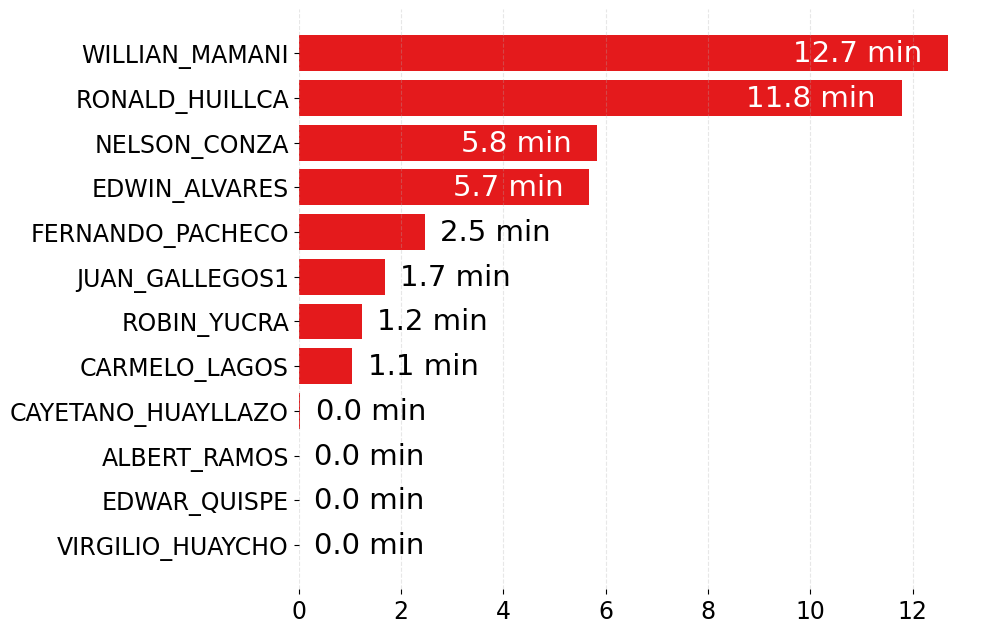

In [8]:
importlib.reload(gs)

gs.main(project_address, df, conductores_ralenti)

### Envio de Reporte

In [13]:
importlib.reload(srtw)

# Envio de reportes a grupo de wssp
def send_reports(group_option):
    WSSP_CONFIF = {
        'page_url': 'https://web.whatsapp.com',
        'group_names': ['PEDREGAL - DISTRIBUCIÓN'] if group_option == 1 else ['GrupoPrueba - ón'],
    }

    srtw.main(project_address, WSSP_CONFIF, conductores_ralenti['mail_data_time'])

# 🔁 Bucle de confirmación
while True:
    print("\nSelecciona grupo de wssp:")
    print("  [1] Grupo Oficial")
    print("  [2] Grupo de Prueba")
    print("  [3] Terminar proceso")

    group_option = int(input("\n>> Opción (1 - 3): "))

    if group_option == 3 or group_option > 2:
        print("\n[✓] Proceso finalizado.")
        break  # salir del bucle
    else:        
        send_reports(group_option)


Selecciona grupo de wssp:
  [1] Grupo Oficial
  [2] Grupo de Prueba
  [3] Terminar proceso

.-----------------------------------------------------------------------.


The chromedriver version (138.0.7204.157) detected in PATH at chromedriver.EXE might not be compatible with the detected chrome version (139.0.7258.155); currently, chromedriver 139.0.7258.154 is recommended for chrome 139.*, so it is advised to delete the driver in PATH and retry


[*] Abriendo Grupo de WSSP (GrupoPrueba - ón)
[*] Esperando a que cargue la página...
[✓] WhatsApp Web cargado correctamente.

[✓] Click realizado en el grupo: 'GrupoPrueba - ón'
[✓] Click realizado en el botón de 'Adjuntar'
[*] Cargando imagen  (CONDUCTOR.png) ...
[*] Escribiendo mensaje ...

✅ Reportes enviados correctamente
'-----------------------------------------------------------------------'


Selecciona grupo de wssp:
  [1] Grupo Oficial
  [2] Grupo de Prueba
  [3] Terminar proceso


The chromedriver version (138.0.7204.157) detected in PATH at chromedriver.EXE might not be compatible with the detected chrome version (139.0.7258.155); currently, chromedriver 139.0.7258.154 is recommended for chrome 139.*, so it is advised to delete the driver in PATH and retry



.-----------------------------------------------------------------------.
[*] Abriendo Grupo de WSSP (PEDREGAL - DISTRIBUCIÓN)
[*] Esperando a que cargue la página...
[✓] WhatsApp Web cargado correctamente.

[✓] Click realizado en el grupo: 'PEDREGAL - DISTRIBUCIÓN'
[✓] Click realizado en el botón de 'Adjuntar'
[*] Cargando imagen  (CONDUCTOR.png) ...
[*] Escribiendo mensaje ...

✅ Reportes enviados correctamente
'-----------------------------------------------------------------------'


Selecciona grupo de wssp:
  [1] Grupo Oficial
  [2] Grupo de Prueba
  [3] Terminar proceso

[✓] Proceso finalizado.


### Limpiar carpeta

In [14]:
carpeta = Path(project_address)
#print(list(carpeta.glob('*.png')))

# Eliminar archivos .png
for imagen in carpeta.glob('*.png'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminando: {imagen}')

# Eliminar archivos .xlsx
for imagen in carpeta.glob('*.xlsx'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminando: {imagen}')

Eliminando: c:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\CONDUCTOR.png
Eliminando: c:\Informacion\ralenti\Automatizacion\automatizacion_reporte_ralenti_wssp\ACL T2 - Resumen Operativo de Flota (Por Conductor) - AYA_20250910_020528.xlsx


### Export it as .py

In [1]:
import nbformat
from nbconvert import PythonExporter

# Cargar el notebook
notebook_path = "main.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Eliminar la última celda
nb['cells'] = nb['cells'][:-1]

# Convertir a script .py
exporter = PythonExporter()
codigo_python, _ = exporter.from_notebook_node(nb)

# Guardar el archivo .py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_python)

print("✅ Archivo .py creado sin la última celda.")

✅ Archivo .py creado sin la última celda.
